<a href="https://colab.research.google.com/github/deepenmi/Machine-Learning-Basics/blob/master/TVMarketing_SimpleLinearRegressin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression
Building a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

## **Step 1: Understanding the Data**


1.   Importing data using the pandas library
2.   Understanding the structure of the data




In [0]:
import pandas as pd


Data is stored in the google drive. Google drive is mounted and can be seen as **drive/My Drive** when we list the directories.
Data is stored in the folder **colabdata** in the google drive.

In [2]:
ls

drive/  sample_data/


In [0]:
data = pd.read_csv("drive/My Drive/colabdata/tvmarketing.csv")

In [7]:
# Display the first 5 rows
data.head(5)
# Display last 5 rows
data.tail(5)

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [8]:
# Checking the columns info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
# Checking the shape of the dataframe (rows,columns)
data.shape

(200, 2)

In [10]:
# Looking statistical information about the dataframe
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## **Visualizing data using seaborn**

In [0]:
# Conventioal way to import seaborn
import seaborn as sns

# To visualize in the notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


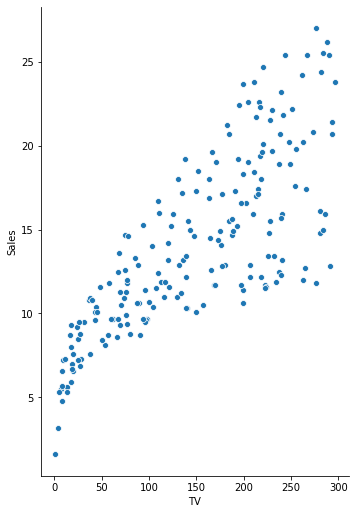

In [13]:
# Visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV'], y_vars='Sales', size=7, aspect=0.7, kind='scatter')

## **Performing Simple Linear Regression**

y = c + mx

The **m** values are called the **model coefficients** or **model parameters**.

### Generic steps in Model Building using sklearn
Generic structure of modeling using scikit-learn library. Broadly, the steps to build any model can be divided as follows:



*   **Preparing X and y**


1.   The scikit-learn library expects X (feature variable) and y (response variable) to be Numpy arrays.
2.   However, X can be a dataframe as Pandas is built over Numpy




*   **Splitting Data into training and test Sets**



In [0]:
# Putting feature variable to X
X = data['TV']
y = data['Sales']

In [0]:
# random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
# Note: sklearn.cross_validation is deprecated therefore, it will give error.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=100)

In [23]:
train_test_split

<function sklearn.model_selection._split.train_test_split>

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [0]:
# It is general convention in scikit-learn that observations are rows, while features are columns.
# This is needed only when you are using a singe feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:,np.newaxis]

## **Performing Linear Regression**

In [26]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Coefficient Calculation**

In [27]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

6.98966585741168
[0.04649736]


y = 6.98966585741168 + 0.04649736 * TV

The above equation can be used to predict the sales value.

## **Predictions**

In [0]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)


## **Computing RMSE and R^2 Values**

Text(0, 0.5, 'Sales')

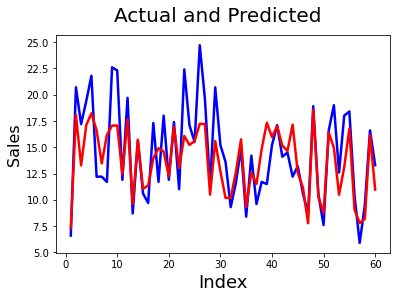

In [30]:
# Actual Vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

## **Error Terms**


Text(0, 0.5, 'ytest-ypred')

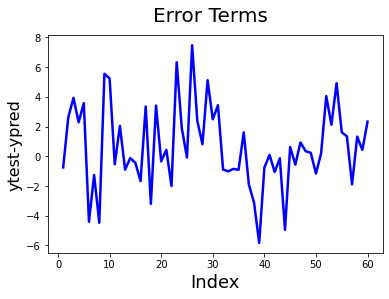

In [31]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16)

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [0]:
r_squared = r2_score(y_test,y_pred)

In [34]:
print('Mean Squared Error : ', mse)
print('R Squared Value : ', r_squared)


Mean Squared Error :  7.975798532854851
R Squared Value :  0.5942987267783302


Text(0, 0.5, 'Predicted Y')

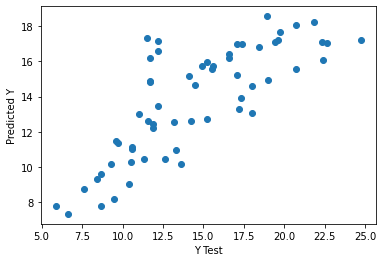

In [35]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')